In [5]:
import sys
sys.path.append("../")

from Experiments.utils import DataFunctions

import numpy as np
import quimb as qu
import quimb.tensor as qtn

# gen gates for quantum phase estimation
start with quantum phase estimation.

2 registers, work and aux,

1. work qubits are initialized to $|0\rangle$ and aux qubits are initialized to $|\Psi \rangle$ an eigen vector of $U$ (not critical its an eigen value)

2. controled phase gates are applied

3. quantum fourier transform

TODO:
- check results
- expand
- pull out metrics after each step


In [239]:
def hadamard_layer(circ,n,m, gate_round=None):
    """Apply a parametrizable layer of single qubit ``U3`` gates.
    """
    for i in range(n):
        # initialize with random parameters
        # params = qu.randn(3, dist='uniform')
        circ.apply_gate(
            'H',i,gate_round=gate_round)

def aux_init(circ,n,m,gate_round = None):
    for i in range(m):
        # initialize with random parameters
        params = qu.randn(3, dist='uniform')
        circ.apply_gate('x',n+i)
        # circ.apply_gate(
        #     'U3', *params, n+i,
        #     gate_round=gate_round, parametrize=True)

def U_layer(circ,n,m, r_t = np.pi/2, reverse=False, gate_round=None):
    """apply controlled phase gates
    """
    for i in range(n):
        for _ in range(i+1):
            # print(i,n)
            circ.apply_gate(qu.ncontrolled_gate(1,qu.phase_gate(r_t)),i,n,gate_round=gate_round)
    # regs = range(0, circ.N - 1)
    # if reverse:
    #     regs = reversed(regs)

    # for i in regs:
    #     circ.apply_gate(
    #         gate2, i, i + 1, gate_round=gate_round)
def qft_layer(circ,n,m,gate_round=None):
    "transpose so backwards"
    for i in range(n, -1, -1):
        for j in range(i+1,n):
            circ.apply_gate(qu.ncontrolled_gate(1,qu.phase_gate(-2*np.pi/(2**(j-i+1)))),j,i,gate_round=gate_round)
        circ.apply_gate("H",i,gate_round=gate_round)
def qpe_circuit(n,m, depth, r_t = np.pi/2, **kwargs):
    """Construct a circuit of single qubit and entangling layers.
    """
    circ = qtn.Circuit(n+m, **kwargs)
    hadamard_layer(circ,n,m)
    aux_init(circ,n,m)
    U_layer(circ,n,m,r_t)
    qft_layer(circ,n,m)


    return circ

In [244]:
n = 4
m = 1 #number of 
depth = 9
gate2 = 'CZ'

circ = qpe_circuit(n,m, depth, r_t = 2*np.pi/5)
circ

<Circuit(n=5, num_gates=26, gate_opts={'contract': 'auto-split-gate', 'propagate_tags': 'register'})>

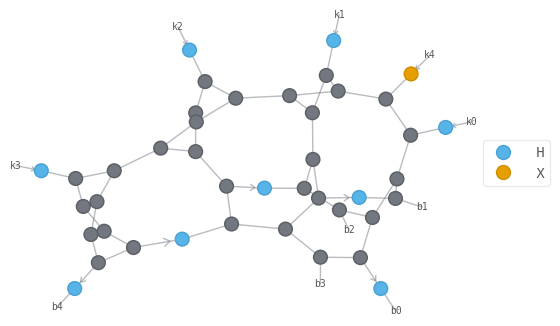

In [245]:
# types of gate
V.draw(color=['H', "X"], show_inds=True)

In [246]:
samps = circ.sample(1000,[i for i in range(n)])
results = [i for i in samps]

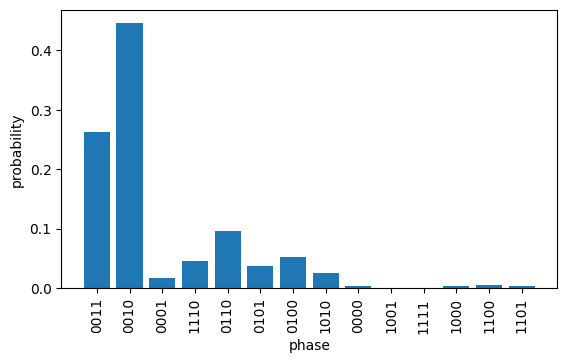

In [247]:
import matplotlib.pyplot as plt
from collections import Counter
c = Counter(results)
# bit_strings = [f"0.{x:{n}b}" for x in range(len(results))]

plt.bar(c.keys(),np.array(list(c.values()))/len(results))
plt.xlabel("phase")
plt.ylabel("probability")
plt.xticks(rotation="vertical")
plt.subplots_adjust(bottom=0.3)

plt.show()

example to compare to https://pennylane.ai/qml/demos/tutorial_qpe